# 서포트 벡터 머신 (Support Vector Machine, SVM)

**서포트 벡터 머신(SVM)**은 지도 학습(Supervised Learning) 알고리즘으로, **분류(Classification)**와 **회귀(Regression)** 문제에 모두 사용할 수 있습니다. 데이터가 선형적으로 분리되지 않는 경우에도 **커널 트릭(Kernel Trick)**을 사용해 고차원 공간에서 데이터를 분리할 수 있습니다.

---

## SVM의 특징
1. **결정 경계 (Decision Boundary)**:
   - SVM은 데이터를 분리하는 **최적의 초평면(Hyperplane)**을 찾아냅니다.
   - 초평면은 각 클래스에서 가장 가까운 데이터 포인트(서포트 벡터)와의 거리를 최대화하도록 설정됩니다.

2. **서포트 벡터 (Support Vectors)**:
   - 초평면에 가장 가까운 데이터 포인트를 의미하며, 모델 학습에 중요한 역할을 합니다.
   - 다른 데이터 포인트는 초평면 결정에 영향을 주지 않습니다.

3. **커널 트릭 (Kernel Trick)**:
   - 선형적으로 분리되지 않는 데이터를 고차원 공간으로 변환하여 선형적으로 분리 가능하게 만듭니다.
   - 일반적인 커널:
     - **선형 커널(Linear Kernel)**: 데이터가 선형적으로 분리 가능할 때 사용.
     - **폴리노미얼 커널(Polynomial Kernel)**: 다항식 형태의 변환.
     - **RBF 커널(Radial Basis Function Kernel)**: 가우시안 커널로도 알려져 있으며, 대부분의 경우 기본값.

---

## SVM의 장단점
### **장점**
1. **높은 성능**:
   - 고차원 데이터에서도 효과적이며, 과적합을 방지.
2. **유연성**:
   - 다양한 커널 함수로 선형 및 비선형 데이터를 처리 가능.
3. **작은 데이터셋에서 우수**:
   - 적은 데이터로도 높은 성능을 발휘.

### **단점**
1. **큰 데이터셋에서 느림**:
   - 샘플 크기가 크면 학습 속도가 느려질 수 있음.
2. **파라미터 튜닝 필요**:
   - C(Regularization)와 커널 파라미터를 잘 조정해야 최적의 성능을 발휘.
3. **확률 출력 제한**:
   - 기본적으로 확률 예측이 지원되지 않으며, 추가 계산이 필요.

---

## SVM의 주요 하이퍼파라미터
| **파라미터**        | **설명**                                                                 |
|--------------------|-------------------------------------------------------------------------|
| **C**              | 정규화 강도. 값이 작을수록 더 강한 규제가 적용되어 과적합 방지.                     |
| **kernel**         | 커널 유형. (`linear`, `poly`, `rbf`, `sigmoid`).                         |
| **gamma**          | RBF 커널에서의 영향력 범위. 값이 크면 영향 범위가 작아지고, 값이 작으면 넓어짐.         |
| **degree**         | 다항식 커널에서 다항식의 차수.                                             |

---

## SVM의 활용 사례
1. **분류 문제**:
   - 이메일 스팸 필터링, 이미지 분류, 질병 진단.
2. **회귀 문제**:
   - 주택 가격 예측, 수요 예측.
3. **이상치 탐지**:
   - 비정상 데이터 탐지 및 이상 행동 분석.
4. **텍스트 분류**:
   - 문서나 텍스트 데이터를 기반으로 카테고리 분류.

---

## 1. Classification

Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



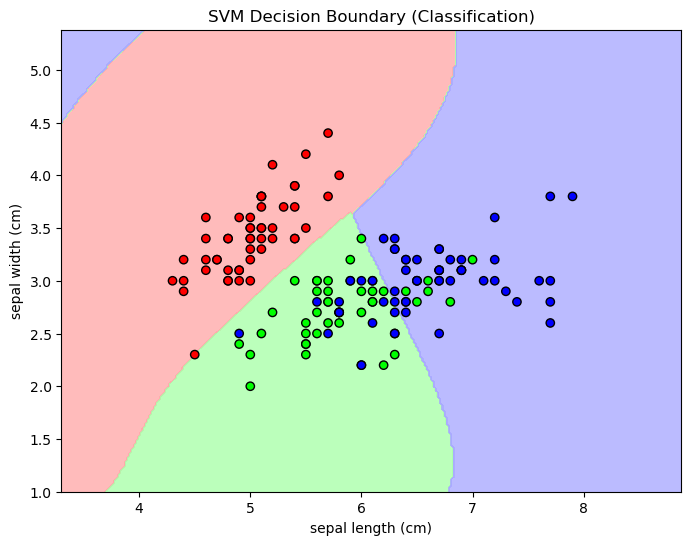

In [4]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Load dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM classifier
svm_clf = SVC(kernel='rbf', C=1.0, gamma=0.7)
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred = svm_clf.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Visualize decision boundaries
def plot_decision_boundaries(X, y, classifier, title):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['#FF0000', '#00FF00', '#0000FF']))
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

# Plot decision boundaries
plot_decision_boundaries(X, y, svm_clf, "SVM Decision Boundary (Classification)")

## 2. Regression

Mean Squared Error (MSE): 0.73
Mean Absolute Error (MAE): 0.60


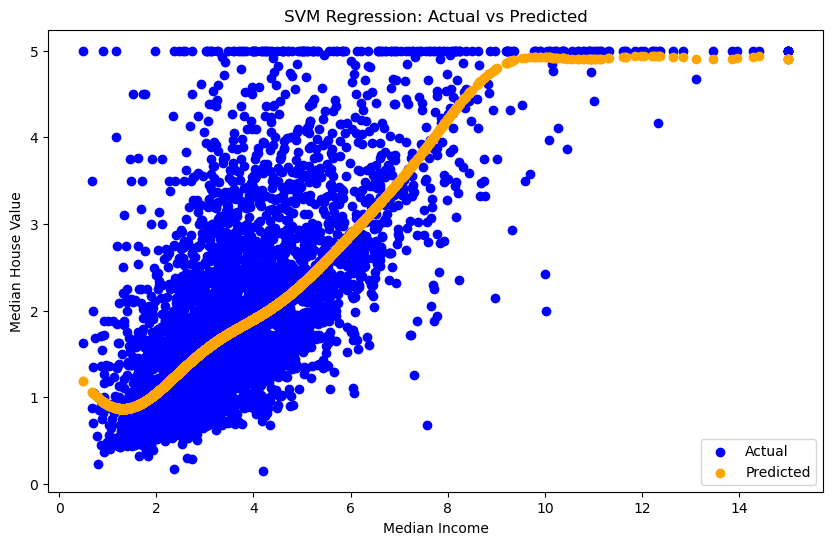

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Load dataset
housing = fetch_california_housing(as_frame=True)
X = housing.data[["MedInc"]]  # Use only one feature (Median Income) for visualization
y = housing.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train SVM Regressor
svr = SVR(kernel='rbf', C=100, gamma=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual")
plt.scatter(X_test, y_pred, color="orange", label="Predicted")
plt.title("SVM Regression: Actual vs Predicted")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.legend()
plt.show()
